In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('mba.csv',header=None)

In [4]:
df.shape

(7501, 20)

### Apriori algorithm

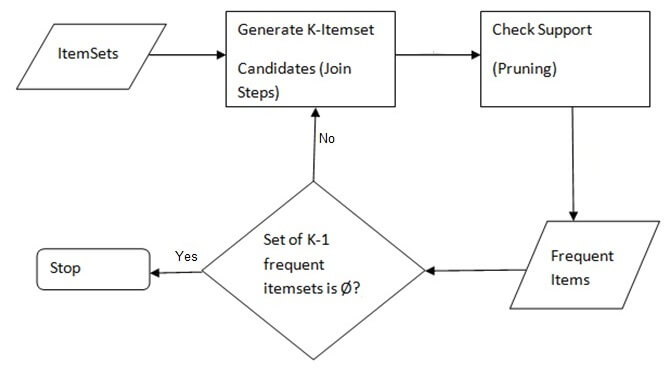


How does Apriori Algorithm Work ?
A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

All subsets of a frequent itemset must be frequent
Similarly, for any infrequent itemset, all its supersets must be infrequent too

#### Step 1: Create a frequency table of all the items that occur in all the transactions.

#### Step 2: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

#### Step 3: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

#### Step 4: We will now count the occurrences of each pair in all the transactions.

#### Step 5: Again only those itemsets are significant which cross the support threshold

#### Step 6: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.


In [5]:
!pip install mlxtend

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
!pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in c:\anaconda3\lib\site-packages (0.17.1)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
!pip install --no-binary :all: mlxtend

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
!pip install mlxtend --user

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Using Transaction encoder

In [9]:
import numpy as np

In [10]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [11]:
from mlxtend.preprocessing import TransactionEncoder

In [12]:
te = TransactionEncoder()
df = te.fit_transform(trans)
df = pd.DataFrame(df, columns = te.columns_)

In [13]:
df = df.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

In [14]:
from mlxtend.frequent_patterns import apriori

In [15]:
#Now, let us return the items and itemsets with at least 5% support:
apriori(df, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
5,0.174110,(spaghetti)
6,0.071457,(shrimp)
7,0.052393,(grated cheese)
8,0.179709,(eggs)
9,0.080389,(cookies)


### Selecting and Filtering the Results

In [16]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [17]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(mineral water, chocolate)",2
25,0.059725,"(spaghetti, mineral water)",2
26,0.050927,"(eggs, mineral water)",2


In [18]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


### Association Mining

In [19]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(eggs, mineral water)",2


In [20]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
0,0.238368,(mineral water),1


In [21]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'} ]

,support,itemsets,length
13,0.129583,(milk),1


In [22]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

,support,itemsets,length
22,0.059992,(chicken),1


In [23]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

,support,itemsets,length
4,0.095321,(frozen vegetables),1


In [24]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

,support,itemsets,length
3,0.163845,(chocolate),1
